In [1]:
  !git clone https://github.com/udacity/ud120-projects

Cloning into 'ud120-projects'...
remote: Counting objects: 5035, done.
remote: Total 5035 (delta 0), reused 0 (delta 0), pack-reused 5035
Receiving objects: 100% (5035/5035), 19.64 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (4373/4373), done.
Checking out files: 100% (4706/4706), done.


In [1]:
import os
os.chdir('ud120-projects/outliers')

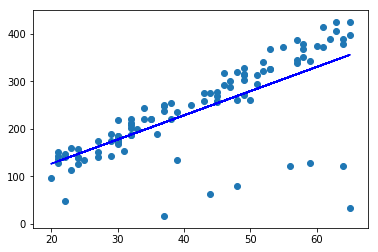

In [30]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like


from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)



try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()



In [3]:
print reg.coef_

[[5.07793064]]


In [4]:
print reg.score(ages_test, net_worths_test)

0.8782624703664671


## 清除异常值后 

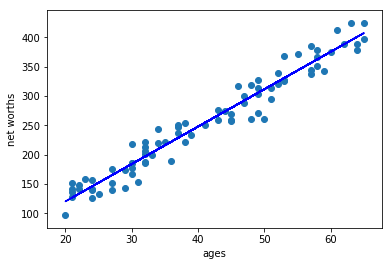

In [5]:

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In [6]:
print reg.coef_

[[6.36859481]]


In [7]:
print reg.score(ages_test, net_worths_test)

0.983189455395532


## 安然异常值

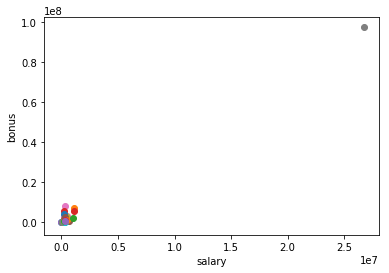

In [8]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()



In [12]:
print data[88][0]

247338.0


In [17]:
for d in data:
    if d[0] > 733800.0:
        print d

[1072321. 7000000.]
[1111258. 5600000.]
[26704229. 97343619.]
[1060932. 2000000.]


In [29]:
for dd in data_dict:
    if float(data_dict[dd]['bonus']) > 97343610:
        print dd
        print data_dict[dd]
        print data_dict[dd]['bonus']

TOTAL
{'salary': 26704229, 'to_messages': 'NaN', 'deferral_payments': 32083396, 'total_payments': 309886585, 'exercised_stock_options': 311764000, 'bonus': 97343619, 'restricted_stock': 130322299, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': -7576788, 'total_stock_value': 434509511, 'expenses': 5235198, 'loan_advances': 83925000, 'from_messages': 'NaN', 'other': 42667589, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 1398517, 'deferred_income': -27992891, 'long_term_incentive': 48521928, 'email_address': 'NaN', 'from_poi_to_this_person': 'NaN'}
97343619


### 删除异常值TOTAL

In [ ]:
data_dict.pop('TOTAL',0)

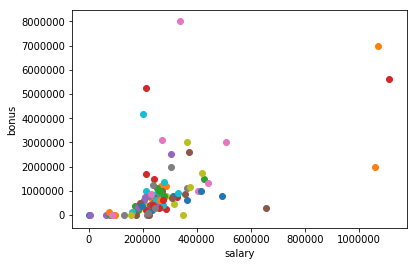

In [32]:
data = featureFormat(data_dict, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [33]:
for dd in data_dict:
    if float(data_dict[dd]['bonus']) > 5000000:
        print dd
        print data_dict[dd]
        print data_dict[dd]['bonus']

LAVORATO JOHN J
{'salary': 339288, 'to_messages': 7259, 'deferral_payments': 'NaN', 'total_payments': 10425757, 'exercised_stock_options': 4158995, 'bonus': 8000000, 'restricted_stock': 1008149, 'shared_receipt_with_poi': 3962, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 5167144, 'expenses': 49537, 'loan_advances': 'NaN', 'from_messages': 2585, 'other': 1552, 'from_this_person_to_poi': 411, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 2035380, 'email_address': 'john.lavorato@enron.com', 'from_poi_to_this_person': 528}
8000000
LAY KENNETH L
{'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'exercised_stock_options': 34348384, 'bonus': 7000000, 'restricted_stock': 14761694, 'shared_receipt_with_poi': 2411, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 49110078, 'expenses': 99832, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16

### 得出结论
- LAY KENNETH L
- SKILLING JEFFREY K

> 这两个人的工资大于 100W 奖金大于 500W